# **Question 2**
Virginia Tech and UVA are undoubtedly some of the best schools in the State of Virginia. In our previous analysis we concluded by the metric of student satisfaction, that VT seems to be the better school. In this analysis, we examine Virginia Tech and the University of Virginia under the assumption that each institution excels in different aspects of student life. Our central research question is: **"How do VT and UVA compare across various dimensions?"**

 For this analysis we will be looking at 10 different areas of student life:
 Food, Facilities, Reputation, Happiness, Safety, Opportunities, Clubs, Social, Internet and Location

 - But, how do we compare the schools? We know the rankings of each school based on different websites such as USNews, WSJ, Niche, etc. We could aggregate the average ranking of each source and see who has the higher ranking. The biggest problem with this approach is we don't consider students. These websites are made by reviewers who aren't students or alumni of these universities and many of them don't include a student's experience. This leads us to a better question.

 - After looking at the difference in sentiment in both the Reddit and RateMyProfessors data, we didn't see much of a difference within the Reddit comments. After looking closer at this data, there weren't many reviews, but mostly just students asking questions. This led us to only use the RateMyProfessors data along with categorical data that is also provided on this website.

# **Analysis**
In an effort to gain more insight into the RateMyProfessor comments, we went ahead and extracted the overall rating attached to the comment. With this we are hoping to explore if there is a relationship between the sentiment of the comment and rating itself.

Starting off, we used Selenium to scrap these reviews and attach them to the same comments we used in our inital analysis. This data is then stored in "VTRMPNEW.csv" and "UVARMPNEW.csv".

## Cosine Similarity

With this new data, we are going to explore the cosine similarity between comments from both VT and UVA. This will allow us to see how closely related the sentiments and ratings are across both student bodies. To begin, we imported the data from the CSV files into separate dataframes, which we'll then merge into a cellective dataset. Another dataframe was also created to store just the reviews.

In [6]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import string
import pandas

In [8]:
## Creates a DataFrame for Virginia Tech & UVA reviews
vt_data = pandas.read_csv("data/VTRMPNEW.csv")
uva_data = pandas.read_csv("data/UVARMPNEW.csv")

df_vt = pandas.DataFrame({'Review': vt_data.Review.map(lambda x : x.replace(',','').replace('.','').lower().split()), "label":0, 'Rating':vt_data.Rating})
df_uva = pandas.DataFrame({'Review': uva_data.Review.map(lambda x : x.replace(',','').replace('.','').lower().split()), 'label':1, 'Rating':uva_data.Rating})

In [10]:
# Combines VT and UVA DataFrames into a single labeled dataset
rateMyComments_labeled = pandas.concat([
    df_vt, df_uva],
    axis=0).reset_index(drop=True)

# Creates a new DataFrame containing only the 'Review' column
rateMyComments = pandas.DataFrame({'Review':rateMyComments_labeled['Review']})
rateMyComments

,Review
0,"[couldn't, be, a, more, perfect, school, for, ..."
1,"[this, place, is, perfect]"
2,"[best, decision, of, my, life, go, hokies]"
3,"[love, it]"
4,"[great, school, all, around, have, loved, my, ..."
...,...
235,"[so, insanely, happy]"
236,"[believe, the, hype]"
237,"[great, school, work, is, challenging, and, ni..."
238,"[i'm, currently, in, my, third-year, here, at,..."


With all of the data organized, we can now compute the normalized TFIDF (Term Frequency-Inverse Document Frequency) matrix. This metric measures how important a term is relative to the entire collection of comments. The TFIDF values will then be used to compute our cosine similarity matrix.

In [13]:
# Computes Term Frequency (TF) for each review
TF = rateMyComments.Review.apply(lambda bag: pandas.Series(bag).value_counts())

# Computes Document Frequency (DF)
DF = TF.count()
IDF = np.log(len(TF)/DF)

# Computes TF-IDF scores
TFIDF = TF*IDF

# Computes document magnitudes for normalization
docmags = (TFIDF*TFIDF).sum(axis=1)**0.5

# Normalizes TF-IDF values by document magnitudes
nTFIDF = TFIDF.divide(docmags, axis=0)

# Fills NaN values with 0 for stability
znTFIDF = nTFIDF.fillna(0.0)

# Computes cosine similarity matrix between reviews
cossim = znTFIDF.dot(znTFIDF.transpose())

# Replaces self-similarity values with NaN for clarity
np.fill_diagonal(cossim.values, np.nan)
cossim

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,NaN,0.150326,0.011997,0.064608,0.081381,0.129984,0.024857,0.0,0.0,0.115806,...,0.043504,0.117374,0.040877,0.031253,0.124046,0.000000,0.004705,0.028803,0.111955,0.037441
1,0.150326,NaN,0.000000,0.000000,0.000000,0.122211,0.012343,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.074098,0.000000,0.000000,0.027553,0.163267,0.147506
2,0.011997,0.000000,NaN,0.000000,0.030216,0.010179,0.000000,0.0,0.0,0.060448,...,0.000000,0.079784,0.007136,0.135565,0.000000,0.000000,0.000000,0.056101,0.059815,0.000000
3,0.064608,0.000000,0.000000,NaN,0.000000,0.054813,0.000000,0.0,0.0,0.117982,...,0.000000,0.212674,0.115287,0.000000,0.000000,0.000000,0.000000,0.000000,0.055543,0.273234
4,0.081381,0.000000,0.030216,0.000000,NaN,0.037377,0.010051,0.0,0.0,0.030756,...,0.064627,0.039248,0.061856,0.014264,0.095576,0.042041,0.000000,0.046146,0.098726,0.104603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.000000,0.000000,0.000000,0.000000,0.042041,0.019537,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.071757,0.000000,0.122086,NaN,0.000000,0.000000,0.000000,0.000000
236,0.004705,0.000000,0.000000,0.000000,0.000000,0.011974,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.013992,0.000000,0.004761,0.000000,NaN,0.000000,0.012134,0.000000
237,0.028803,0.027553,0.056101,0.000000,0.046146,0.029259,0.019942,0.0,0.0,0.024601,...,0.000000,0.028468,0.023210,0.034493,0.024029,0.000000,0.000000,NaN,0.042463,0.053845
238,0.111955,0.163267,0.059815,0.055543,0.098726,0.101406,0.017035,0.0,0.0,0.186402,...,0.025198,0.144773,0.050964,0.000000,0.150864,0.000000,0.012134,0.042463,NaN,0.092535


Now that we have the cosine similarity matrix, we want to identify the most similar reviews. We've extracted the top 30 comment pairs with the highest similarity scores. For better visualization, we've created a dataframe that includes each comment's index, its associated school, the difference in ratings between the paired comments, and their similarity score.

In [16]:
# Displays the top 30 most similar reviews
cossim.max().head(30)

0     0.229249
1     0.421460
2     0.494941
3     1.000000
4     0.203209
5     0.257185
6     0.184662
7     0.163842
8     0.368598
9     0.353604
10    0.305632
11    0.646800
12    0.149254
13    0.147253
14    0.797203
15    0.264812
16    0.250040
17    0.223805
18    1.000000
19    0.493722
20    1.000000
21    0.208310
22    1.000000
23    0.263923
24    0.272550
25    0.160490
26    0.060314
27    0.223895
28    0.160788
29    0.195028
dtype: float64

In [18]:
# Displays the top 30 most similar review pairs
cossim.idxmax().head(30)

0     199
1     199
2      38
3      73
4      70
5      60
6     140
7      71
8      71
9     230
10     63
11    176
12     71
13    171
14     68
15    117
16    228
17    181
18    139
19     91
20    233
21    159
22    168
23     69
24    207
25    159
26    192
27     66
28     80
29     32
dtype: int64

In [20]:
# Defines similarity threshold for identifying related review pairs
threshold = 0.7
pairs = []

# Iterate over the upper triangle of the matrix to avoid duplicate pairs and the diagonal
for i in range(cossim.shape[0]):
    for j in range(i + 1, cossim.shape[1]):
        if cossim.iloc[i, j] >= threshold:
            pairs.append((i, j, cossim.iloc[i, j]))

pairs

[(3, 18, 0.7330927985055354),
 (3, 73, 1.0),
 (3, 79, 0.7795057140929266),
 (3, 139, 0.7330927985055354),
 (3, 176, 0.7213783128692789),
 (3, 183, 0.8852999304014325),
 (14, 68, 0.7972030948600087),
 (14, 97, 0.7972030948600087),
 (14, 206, 0.7972030948600087),
 (18, 73, 0.7330927985055354),
 (18, 139, 1.0),
 (20, 233, 0.9999999999999999),
 (22, 77, 0.8984707421080204),
 (22, 168, 1.0),
 (68, 97, 1.0000000000000002),
 (68, 206, 1.0000000000000002),
 (71, 74, 1.0),
 (71, 92, 1.0),
 (73, 79, 0.7795057140929266),
 (73, 139, 0.7330927985055354),
 (73, 176, 0.7213783128692789),
 (73, 183, 0.8852999304014325),
 (74, 92, 1.0),
 (77, 168, 0.8984707421080204),
 (79, 176, 0.9254304360151002),
 (86, 112, 0.8404345593465172),
 (86, 127, 0.8885216372695218),
 (97, 206, 1.0000000000000002),
 (112, 127, 0.7467442906884565),
 (131, 132, 1.0),
 (176, 183, 0.8148405846391237)]

In [22]:
# List to hold results
result = []

for i, j, sim in pairs:
    # Access the rows for each index using .loc (or .iloc if your DataFrame is strictly positional)
    item1 = rateMyComments_labeled.iloc[i]
    item2 = rateMyComments_labeled.iloc[j]

    # Create a result dictionary that keeps the items paired along with their labels and similarity
    result.append({
        'index1': i,
        'School1': item1['label'],
        'index2': j,
        'School2': item2['label'],
        'Rating_Diff':item1['Rating'] -item2['Rating'],
        'similarity': sim
    })

# Convert the result into a DataFrame
result_df = pandas.DataFrame(result)
result_df

,index1,School1,index2,School2,Rating_Diff,similarity
0,3,0,18,0,0.0,0.733093
1,3,0,73,0,0.0,1.000000
2,3,0,79,0,0.3,0.779506
3,3,0,139,1,0.0,0.733093
4,3,0,176,1,0.9,0.721378
5,3,0,183,1,0.9,0.885300
6,14,0,68,0,0.9,0.797203
7,14,0,97,0,0.5,0.797203
8,14,0,206,1,0.4,0.797203
9,18,0,73,0,0.0,0.733093


From the dataframe above, we observe that:

- Many pairs have a perfect similarity score, which indicates nearly identical language was used in the comments. This is intriguing when you look closer and see that many of these pairs are associated with different schools.
- When factoring in the rating differences, some highly similar comments have identical ratings while others don't. So similarity here may not be a good indicator of rating.

## Assessing Attributes

Now we want to assess how the 10 different aspects of student life (Food, Facilities, Reputation, Happiness, Safety, Opportunities, Clubs, Social, Internet, Location) factor into these reviews. To do this, we're analyzing the RateMyProfessors comments by collecting the rating for each attribute associated with individual comments. We determine these ratings by recording the gray value of each of the 5 bar segments and using logic to identify filled versus unfilled bars. For example, if no bar segments are gray (unfilled), then the attribute has received a rating of 5.

These results are then stored in CSV files named "all_vt.csv" and "all_uva.csv".

Following this, we clean the comments by removing punctuation, filtering out stop words, and identifying unique words and their frequencies for each school. We also import and structure the quantitative data for further analysis.

In [28]:
# Bring in the datasets to process the UVA and VT metrics of RateMyProfessors

# Read in the positive, negative and stopword files for later comparison
positives = set(open('positive.txt').read().split())
negatives = set(open('negative.txt').read().split())
stopwords = open('stopwords.txt').read()

# Read in the RateMyProfessors reviews from earlier
vt_data = pandas.read_csv("data/all_vt.csv")
uva_data = pandas.read_csv("data/all_uva.csv")

# Start the processing of the UVA reviews

# First clean punctuation and gather individual words
uva_text = uva_data['Review'].map(lambda uva_text: ''.join([char if char not in string.punctuation + string.digits else ' ' for char in uva_text]).lower().split())
bag_uvarates = uva_text.sum()

# # Filter out stopwords
bag_uvarates = [word for word in bag_uvarates if word not in stopwords]

# # Find unique words and their frequencies
vocab_uvarates = set(bag_uvarates)
freqs_uvarates = [(bag_uvarates.count(word), word) for word in vocab_uvarates]


# # Start the processing of the VT reviews

# # First clean punctuation and gather individual words
vt_text = vt_data['Review'].map(lambda vt_text: ''.join([char if char not in string.punctuation + string.digits else ' ' for char in vt_text]).lower().split())
bag_vtrates = vt_text.sum()

# # Filter out stopwords
bag_vtrates = [word for word in bag_vtrates if word not in stopwords]

# # Find unique words and their frequencies
vocab_vtrates = set(bag_vtrates)
freqs_vtrates = [(bag_vtrates.count(word), word) for word in vocab_vtrates]

In [30]:
# Loads Virginia Tech RateMyProfessors data from CSV
vt_RMP_all = pandas.read_csv("data/all_vt.csv") # Extracts quantitative columns for analysis

# Displays the VT quantitative data
vt_RMP_all_quant = vt_RMP_all[['Reputation', 'Location', 'Opportunities', 'Facilities', 'Internet', 'Food', 'Clubs', 'Social', 'Happiness', 'Safety']]
vt_RMP_all_quant

# Loads University of Virginia RateMyProfessors data from CSV
uva_RMP_all = pandas.read_csv("data/all_uva.csv")# Extracts quantitative columns for analysis

# Extracts quantitative columns for analysis
uva_RMP_all_quant = uva_RMP_all[['Reputation', 'Location', 'Opportunities', 'Facilities', 'Internet', 'Food', 'Clubs', 'Social', 'Happiness', 'Safety']]


## Visualizations

With all of the data imported and cleaned, we can now begin visualization. First, we'll use a parallel coordinates graph to identify patterns or correlations between the 8 different aspects of student life across both schools.

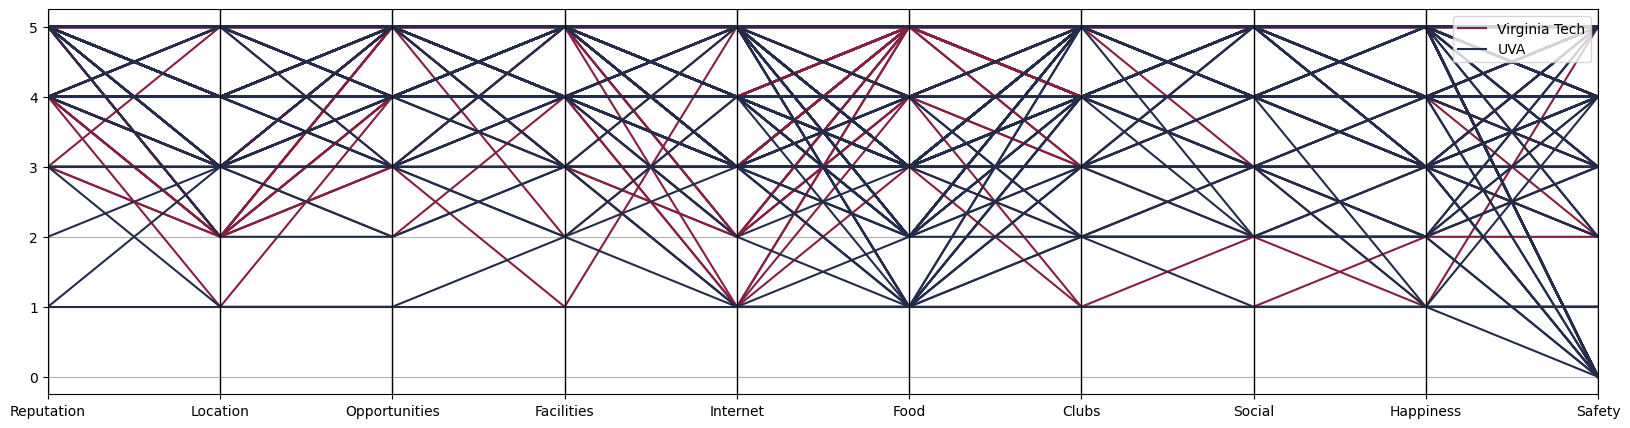

In [34]:
# Creates copies of the VT and UVA quantitative datasets to avoid modifying originals
vt_RMP_all_quant = vt_RMP_all_quant.copy()
uva_RMP_all_quant = uva_RMP_all_quant.copy()

# Adds a 'School' columns
vt_RMP_all_quant['School'] = 'Virginia Tech'
uva_RMP_all_quant['School'] = 'UVA'
all_RMP = pandas.concat([vt_RMP_all_quant, uva_RMP_all_quant], ignore_index=True) # Combines both datasets into a single DataFrame

vt_color = '#861F41'  # Virginia Tech's maroon
uva_color = '#232D4B'  # UVA's navy blue

# Creates a parallel coordinates plot to compare ratings across categories
ax = pandas.plotting.parallel_coordinates(all_RMP, class_column='School', color=[vt_color, uva_color])

ax.figure.set_size_inches(20, 5)

The parallel coordinates graph above displays ratings for nine aspects of students life on a scale from 0-5. The lines indicate rating combinations, with the maroon representing VT and navy blue representing UVA.
Some things we observe are:
- For most categories, ratings range from 1-5 for both schools. This suggests that students are having varied experiences at their institution.
- When looking at the saftey ratings, we see that UVA has several low ratings that drop to 0. This suggests that UVA students may have greater saftey concerns than VT students.
- While there is a considerable overlap between schools, VT seems to have more ratings in the 3-5 range for Reputation and Food, and slightly higher ratings for Opportunities.

Next, we'll examine the Principal Component Analysis (PCA) and Multidimensional Scaling (MDS) of these attributes.

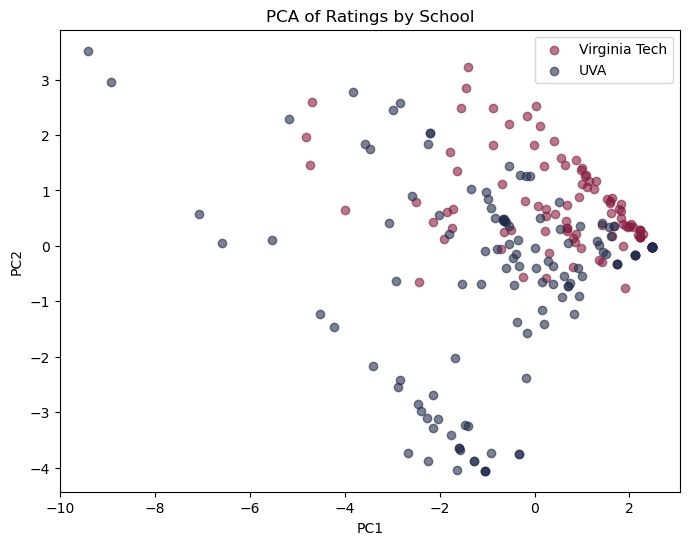

In [38]:
from sklearn.decomposition import PCA

#
RMP_ratings = all_RMP[['Reputation', 'Location', 'Opportunities', 'Facilities', 'Internet',
            'Food', 'Clubs', 'Social', 'Happiness', 'Safety']]
labels = all_RMP['School']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(RMP_ratings)

# Plot
plt.figure(figsize=(8,6))
for school, color in zip(['Virginia Tech', 'UVA'], [vt_color, uva_color]):
    plt.scatter(X_pca[labels == school, 0], X_pca[labels == school, 1],
                label=school, alpha=0.6, color=color)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Ratings by School')
plt.legend()
plt.show()

Looking at the PCA graph, we observe overlap between schools in the center-right region, with VT's points clustering more tightly in the upper right section. This suggests VT students may have more consistent experiences. UVA's points are more dispersed, extending toward the left and lower regions, which could indicate greater variability in their student experiences.

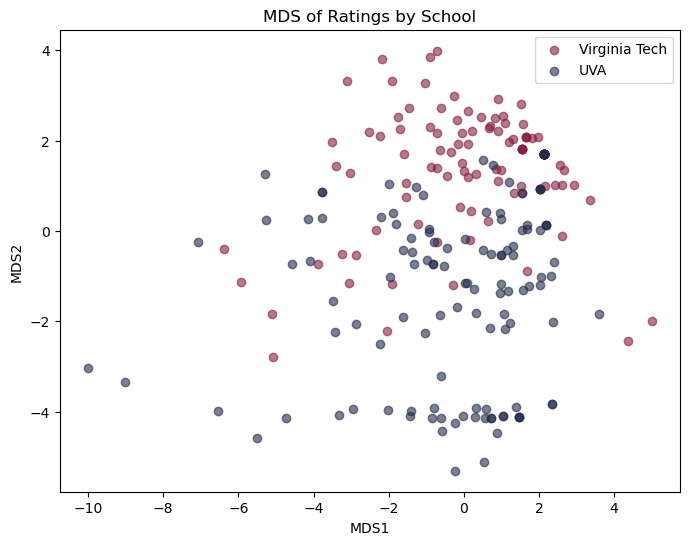

In [41]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=0)
X_mds = mds.fit_transform(RMP_ratings)

# Plot
plt.figure(figsize=(8,6))
for school, color in zip(['Virginia Tech', 'UVA'], [vt_color, uva_color]):
    plt.scatter(X_mds[labels == school, 0], X_mds[labels == school, 1],
                label=school, alpha=0.6, color=color)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS of Ratings by School')
plt.legend()
plt.show()

Looking at the MDS graph, we observe a similar pattern to the PCA, but with clearer separation. VT's points predominantly occupy the upper regions of the graph, while UVA's points are more concentrated in the lower region. We also notice a distinct cluster of UVA points at the bottom of the graph. This vertical differentiation suggests a significant difference in how students at each institution perceive and rate their school.

## Classification

Lastly, we were curious if we could build a classifier that would correctly predict if comments are directed towards VT or UVA.

First, we want to build a TFIDF matrix on the bag including all comments from each school. This allows us to look at the key words associated with each school.

In [46]:
import numpy
comments = pandas.Series([bag_vtrates, bag_uvarates], index=['VT', 'UVA'])

# # only keep words that are in positive or negative
comments = comments.map(lambda bag: [word for word in bag if word in negatives.union(positives)])

TF = comments.apply(lambda bag: pandas.Series(bag).value_counts())

DF = TF.count()

IDF = numpy.log(len(TF)/DF)

TFIDF = TF * IDF
TFIDF = TFIDF[sorted(TFIDF.columns)]
TFIDF

,able,abuse,advantage,amazing,ambitious,annoying,assault,attractive,awesome,awful,...,welcome,willing,wish,wonderful,worried,worse,worst,worth,worthwhile,wrong
VT,NaN,0.693147,0.0,0.0,0.693147,0.0,0.0,NaN,0.0,0.0,...,0.693147,NaN,1.386294,0.0,NaN,NaN,NaN,0.0,NaN,0.693147
UVA,1.386294,NaN,0.0,0.0,NaN,0.0,0.0,0.693147,0.0,0.0,...,NaN,0.693147,NaN,0.0,0.693147,0.693147,1.386294,0.0,0.693147,NaN


In [48]:
largest_10 = TFIDF.apply(lambda row: row.nlargest(10).index.values.tolist(), axis=1)
largest_10 = pandas.Series(largest_10)
vt_important_words = largest_10['VT']
uva_important_words = largest_10['UVA']

uva_important_words

['competitive',
 'excellent',
 'exclusive',
 'extremely',
 'incredibly',
 'special',
 'able',
 'doubt',
 'favorite',
 'fit']

In [50]:
vt_important_words

['especially',
 'safe',
 'balanced',
 'expensive',
 'live',
 'prepared',
 'proactive',
 'wish',
 'abuse',
 'ambitious']

Here we can see that both schools have key words that reflect varying views and ideals.

For UVA:
- "competitive" and "exclusive" - suggests an elite and selective academic or social environment
- "special" and "favorite" - suggests strong, positive connections to aspects of the university
- "doubt" - suggests students potentially struggling with the competitive and exclusive environment

For VT:
- "safe," "balanced," and "prepared" - suggests either a focus on practical education and future success or the well-being of the community
- "proactive" and "ambitious" - suggests a forward thinking, driven student body
- "abuse" and "expensive" - suggests concerns about cost and negative campus experiences


Now we will develop our classification model. We'll create a TF-IDF matrix from student comments, combine text features with numerical rating data, and train a classifier. We've chosen to implement a Decision Tree classifier due to its versatility in handling both numerical and categorical data.

In [54]:
# Take all comments from RateMyProfessors and put them into bags with index labels of 0 and 1 for each school
all_comments = pandas.concat([
    pandas.DataFrame({'review': uva_text, 'label': 0}),
    pandas.DataFrame({'review': vt_text, 'label': 1})
]).reset_index(drop=True)
all_comments = pandas.Series(all_comments['review'].values, index=all_comments['label'])

In [56]:
all_TF = all_comments.apply(lambda bag: pandas.Series(bag).value_counts())

all_DF = all_TF.count()

all_IDF = numpy.log(len(all_TF)/all_DF)

all_TFIDF = all_TF * all_IDF
all_TFIDF = all_TFIDF[sorted(all_TFIDF.columns)]

all_TFIDF = all_TFIDF.reset_index()
all_TFIDF = all_TFIDF.fillna(0)
X_TFIDF = all_TFIDF.drop(columns=['label'])
y_TFIDF = all_TFIDF['label']

In [58]:
X_combined = np.hstack([X_TFIDF, RMP_ratings])
y_combined = all_RMP['School']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

          UVA       0.92      0.92      0.92        24
Virginia Tech       0.92      0.92      0.92        24

     accuracy                           0.92        48
    macro avg       0.92      0.92      0.92        48
 weighted avg       0.92      0.92      0.92        48



Our classifier accurately predicted the school associated with each comment. It identified UVA comments with 92% precision and 92% recall, and VT comments with 92% precision and 92% recall.

# **Conclusion**

Let's start by addressing our focused question: **"How do Virginia Tech and UVA compare across various dimensions?"**

Based on our comprehensive analysis, each technique revealed different insights. Our cosine similarity analysis showed that some comment pairs had perfect similarity scores despite representing different schools, indicating students from both institutions share similar sentiments. The parallel coordinates graph demonstrated that while both schools received varied ratings across the 10 categories, UVA students expressed greater safety concerns, while VT had higher ratings for reputation, food quality, and opportunities. The PCA and MDS revealed significant differences in student experiences, with VT showing more consistent ratings and UVA displaying greater variability, suggesting VT may offer a more uniform student experience.

Now let's circle back to our original question: **"Is Virginia Tech better than UVA?"**

While this will always be a subjective question, our analyses from both parts of the assignment suggest Virginia Tech receives more positive sentiments and provides a more well-rounded, stable environment. This is evidenced in both the PCA and MDS outcomes as well as the keywords associated with each institution.
